## 时间序列建模分析

#### 介绍

本次实验中，将学习时间序列数据分析的相关模型，并使用一些知名的工具来完成时间序列建模分析。

#### 知识点

* 时序数据特点及分类
* 描述性时序分析
* 统计时序分析
* 平稳时间序列检验
* 自相关图和偏自相关图
* 纯随机性检验
* ARMA 介绍及建模
* 差分运算
* ARIMA 介绍及建模

前面，我们学习了使用 Pandas 对时序数据进行处理的相关操作。实际上，当我们面对时序数据时，是想从中分析出某种规律并预测未来时间中数值可能发生的变化。例如，我们可能需要从股票数据中分析出公司未来的股价走势，从气象数据中得到未来某一时刻的天气信息，从访问日志数据中发现可能迎来的高峰。

当我们学习完机器学习建模之后，你可能会想到将其应用到时间序列建模过程中。例如，对于一个以时间为横轴，数值为纵轴的时间序列变化图像。是否可以引入回归模型进行预测呢？

![](https://upload-images.jianshu.io/upload_images/15406304-cf09f23c32bb6a13.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)

上图呈现了股票变化曲线。我们是否可以把年份转换为序号，从而引入回归分析的手段得到未来的预测结果呢？答案肯定是「可以的」，因为用回归的手段实现，没有原理上的阻碍。不过，这只是方法应用上的探讨，至于回归预测的效果如何，我们就无从所知了。

回归预测中，我们举过一个十分经典的例子，那就是房价预测。一般情况下，房屋的价格和其面积正相关。也就是说如果通过二者构建回归模型，面积越大的房子，价格一般会越高。那么，如果我们将数据换成气温变化数据。春夏过度期间，温度会随着时间逐渐升高，但是这样的关系却不会像房价那样持续下去。因为气温的变化到一定时候就会变得平缓，并维持在某个区间波动。此时，如果我们应用回归模型去预测气温，就无法准确地反应现状了。

### 时序数据特点及分类

要想对时间数据进行分析并发现规律，首先得摸清楚时间序列数据有哪些特点：

- 时间序列数据依赖于时间，但不一定是时间的严格函数。
- 时间序列数据每时刻上的值具有一定的随机性，不可能完全准确地用历史值去预测。

与此同时：

- 时间序列数据前后时刻（但不一定是相邻时刻）的数值往往具有相关性。
- 从整体上看，时间序列往往会呈现出某种趋势性或出现周期性变化的现象。

了解完上面的 4 个特点，你会感觉如果直接将机器学习中的回归分析搬到时间序列的预测中了，效果可能并不会很理想。

在对时间序列数据的研究中，我们通常会根据不同的维度将其细分为以下几种不同的类型：

- 按研究对象分类：一元时间序列和多元时间序列。
- 按时间参数分类：离散时间序列和连续时间序列。
- 按统计特性分类：平稳时间序列和非平稳时间序列。
- 按分布规律分类：高斯型时间序列和非高斯型时间序列。

### 描述性时序分析

描述性时序分析又被称之为确定型时序分析，它主要是通过直观的数据比较或绘图观测，寻找序列中蕴含的发展规律。该方法简单直接，所以一般也是时序分析的第一步。

例如，1844 年，德国天文学家海因利希·史瓦贝在 Astronomische Nachrichten 报告了太阳黑子数量的周期性变化规律。其通过系统性的连续观测，发现太阳黑子的爆发呈现出 11 年作用的周期变化。

![](https://upload-images.jianshu.io/upload_images/15406304-939eefc212ec6487.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)

### 统计时序分析

描述性分析方法纵然直观，但其对数据的要求很高，需要保证数据分布呈现出一定的规律性，才能从中得到可信的结论。但是，很多时候我们遇到的时序数据都呈现出明显的随机性，准确预测其走势和变化规律变得困难。

于是，统计时序分析相关方法开始出现，人们尝试利用数理统计学相关的原理和方法来分析时间序列。

在统计时序分析中，一般又被细分为两类不同的分析方法，分别是：频域分析和时域分析。

频域分析，简单来讲就是我们假设任何一种无趋势的时间序列都可以分解成若干不同频率的周期波动。早期的频域分析方法借助傅里叶分析从频率的角度揭示时间序列的规律。后来，其借助了傅里叶变换，用正弦、余弦项之和来逼近某个函数。再到极大熵谱估计理论的引入，频域分析进入了现代谱分析阶段。由于谱分析依赖于强数学背景且不利于直观解释，导致该方法具有很大的局限性，我们也不再做过多介绍。

与频域分析不同，时域分析方法应用要广泛很多。时域分析的原理主要是参照事件发展过程中的惯性，从而通过惯性用统计来描述就是时间序列值之间存在的相关关系，而这种相关关系通常具有某种统计规律。时域分析的目的是，通过寻找出时间序列值之间相关关系的统计规律，并拟合出适当的数学模型来描述这种规律，进而利用这个拟合模型预测序列未来的走势。

时域分析方法的产生最早可以追溯到 1927 年出现的自回归 AR 模型。不久之后，英国数学家、天文学家 Walker 爵士在分析印度大气规律时使用了移动平均 MA 模型和自回归移动平均 ARMA 模型。这些模型奠定了时间序列时域分析方法的基础，其中的 ARMA 模型也被得以广泛应用。再到后来，美国统计学家 Box 和英国统计学家 Jenkins 系统地阐述了对求和自回归移动平均 ARIMA 模型的识别、估计、检验及预测的原理及方法。这些知识现在被称为经典时间序列分析方法，是时域分析方法的核心内容。

其中，ARMA 模型通常被用于平稳时间序列分析过程，而 ARIMA 模型则广泛应用于非平稳序列随机分析过程。

### 平稳时间序列检验

<div style="color: #999;font-size: 12px;font-style: italic;">注意：接下来的内容中，将涉及大量的统计学理论和计量经济学中涉及到的原理。我们不会对复杂理论进行推导和演算，而是直接拿出概念告诉你它的用途和用法。</div>

什么是平稳时间序列？这就需要我们从概率统计的角度来定义。一般来讲，平稳时间序列有两种定义，分别是：严平稳时间序列和宽平稳时间序列。其中，严平稳要求序列所有的统计性质都不会随着时间的推移而发生变化。宽平稳则认为只要保证序列 [<i class="fa fa-external-link-square" aria-hidden="true"> 二阶矩</i>](https://en.wikipedia.org/wiki/Moment_mathematics) 平稳，就代表序列稳定。显然，严平稳比宽平稳的条件严格。严平稳是对序列联合分布的要求，以保证序列所有的统计特征都相同。

关于序列平稳性的检验，一般有两种方法，分别是：图检验和假设检验。图检验是根据时序图和自相关图显示的特征作出判断，因其操作简便而运用广泛。简单来讲，如果一张时序图呈现出明显的增长和下降趋势，那么就一定不平稳。

下面我们给出中国的人口数量变化曲线图，这是一个由年份组成的时间序列。我们称该组数据为 `series1`。

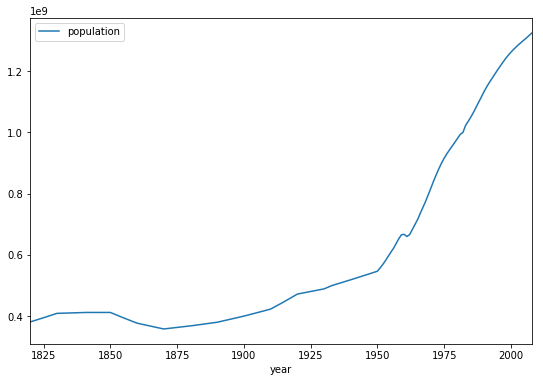

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

series1 = pd.read_csv(
    "http://labfile.oss.aliyuncs.com/courses/1176/total-population.csv", index_col=0)
series1.plot(figsize=(9, 6))

可以看到，`series1` 呈现出明显的增长趋势，就一定不是平稳时间序列。

接下来，我们看一看另外一个时间序列数据。这里我们使用 NumPy 生成随机序列，并称之为 `series2`。

(5, -5)

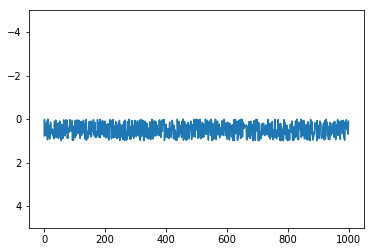

In [2]:
import numpy as np

np.random.seed(10)  # 随机数种子
series2 = np.random.rand(1000)  # 生成随机序列
plt.plot(series2)  # 绘图
plt.ylim(5, -5)

可以看到，`series2` 的序列围绕着某个值上下随机波动，没有明显的趋势和周期性。一般来讲，我们会认为这类序列是平稳的。

不过，对于如上所示的平稳曲线图，我们一般还需要进一步通过自相关图来确认。

### 自相关图

自相关（英语：Autocorrelation），又称之为序列相关，是一个统计学上的概念。相关性其实就是变量之间的关系强度，这里会用到前面学过的皮尔逊相关系数进行检验。

在时间序列中，当我们使用以前的时间步长来计算时间序列观测的相关性时。由于时间序列的相关性与之前的相同系列的值进行了计算，就被称之为自相关。其中自相关函数 ACF 用来度量时间序列中延迟为 $k$ 时，相距 $k$ 个时间间隔（延迟期）的序列值之间的相关性，所形成的图称之为自相关图。

ACF 计算图示如下，原序列为延迟 $k$ 个时间间隔后计算与原序列之间的相关性系数（绿色部分）。

![](https://upload-images.jianshu.io/upload_images/15406304-ca113b1e01e1d1bb.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)


Python 中，我们可以利用 `statsmodels` 统计计算库中的 `plot_acf()` 函数计算和绘制自相关图，也可以使用 Pandas 提供的 `autocorrelation_plot()` 方法绘制。

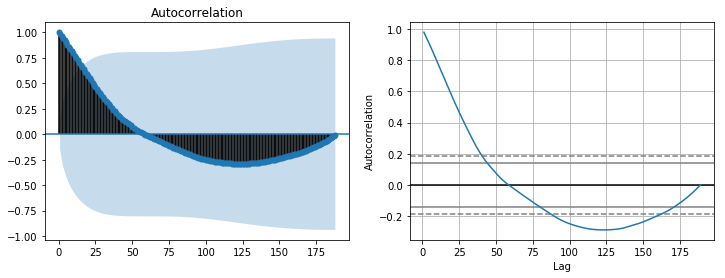

In [3]:
from statsmodels.graphics.tsaplots import plot_acf
from pandas.plotting import autocorrelation_plot

fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(12, 4))

plot_acf(series1, ax=axes[0])
autocorrelation_plot(series1, ax=axes[1])

上图中，我们绘制 `series1` 的自相关图。其中，ACF 图纵轴数值表示相关性，皮尔逊相关系数对应 -1 到 1 之间。

接下来，我们同样绘制 `series2` 的自相关图。

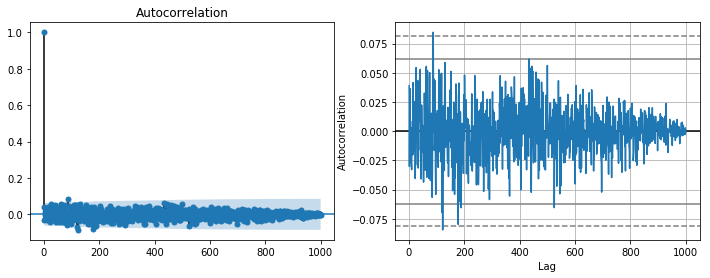

In [4]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(12, 4))

plot_acf(series2, ax=axes[0])
autocorrelation_plot(series2, ax=axes[1])

那么，怎样通过自相关图来判断时间序列的平稳性呢？如 `series1` 和 `series2` 所对应的自相关图所示，平稳序列通常具有短期相关性。该性质用自相关系数来描述就是随着延迟 $k$ 的增加，平稳序列的自相关系数会很快地衰减向零。反之，非平稳序列的自相关系数衰减向零的速度通常比较慢，这就是我们利用自相关图进行平稳性判断的标准。所以，`series2` 对应的序列也就是一个平稳时间序列，而 `series1` 则是非平稳时间序列了。

与此同时，由于 `series2` 对应的自相关图中显示的序列自相关系数一直较小，在 0 附近震荡波动，那么我们会认为这是一个随机性非常强的平稳时间序列。

### 纯随机性检验

一般来讲，我们拿到一个时间序列之后，就会对其进行平稳性检验。如果序列平稳，那么就可以应用 ARMA 等成熟的建模方法完成分析。不过，并不是所有平稳序列都值得建模，例如上面的 `series2` 序列，虽然平稳，但是随机性太强。一般来讲，纯随机序列是没有任何分析价值的。

那么，又引出了新的问题：怎样判断一个平稳序列是否随机呢？这就会用到纯随机性检验。纯随机性检验的过程中，一般会涉及到两个统计量，分别是：Q 统计量和 LB 统计量（Ljung-Box）。但由于 LB 统计量是 Q 统计量的修正，所以业界通常所称的 Q 统计量也就是 LB 统计量。

Python 中，我们可以利用 `statsmodels` 统计计算库中的 `acorr_ljungbox()` 函数计算 LB 统计量，该函数默认会返回 LB 统计量和 LB 统计量的 P 值。如果 LB 统计量的 P 值小于 `0.05`，我们则认为该序列为非随机序列，否则就为随机序列。

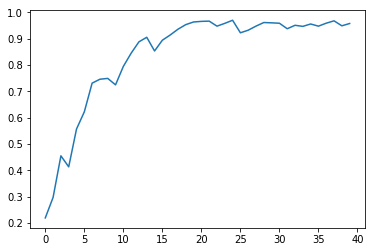

In [5]:
from statsmodels.sandbox.stats.diagnostic import acorr_ljungbox

LB2, P2 = acorr_ljungbox(series2)
plt.plot(P2)

如上所示，`series2` 对应 LB 统计量的 P 值远大于 `0.05`。所以，可以判定其为随机序列，也就再无分析必要了。

下面，我们再看一个非随机性平稳时间序列的各项参数如何。实验给出了 1820-1870 年的太阳黑子统计数据 `series3`，绘制如下：

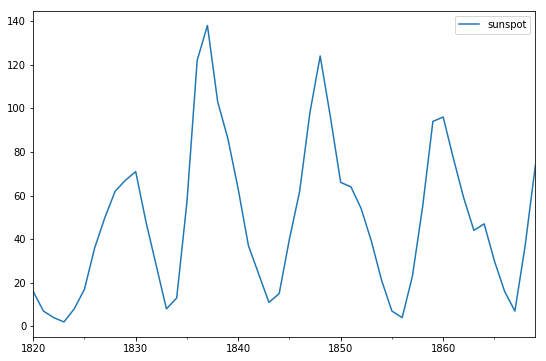

In [6]:
series3 = pd.read_csv(
    "http://labfile.oss.aliyuncs.com/courses/1176/sunspot.csv", index_col=0)
series3.index = pd.period_range("1820", "1869", freq='Y')  # 将索引转换为时间
series3.plot(figsize=(9, 6))

然后进行时间序列的第一步处理：平稳性检验。绘制自相关图如下：

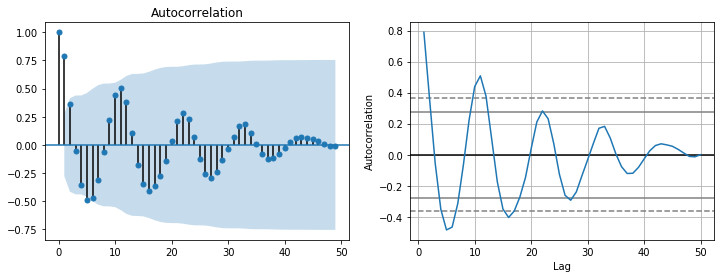

In [7]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(12, 4))

plot_acf(series3, ax=axes[0])
autocorrelation_plot(series3, ax=axes[1])

可以看到自相关图随着延迟期数增加，接近于 0。但没有像上面随机序列那样在 0 附近波动，而后面由呈现出周期变化。所以，可以判断其为周期变化平稳序列。

接下来，我们进行纯随机性检验。计算序列随延迟期数增加的 LB 统计量和对应的 P 值，并绘制 P 值变化图像。

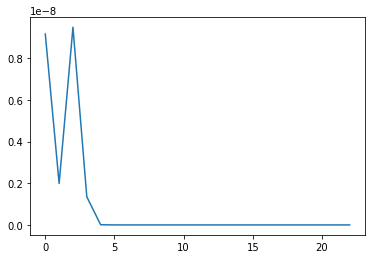

In [8]:
LB3, P3 = acorr_ljungbox(series3)
plt.plot(P3)

如上图所示，P 值远小于 0.05（注意纵轴单位），那么说明序列为非纯随机序列。

以上，我们介绍了对时间序列的预处理步骤，分别是：平稳性检验和纯随机性检验，而这两步往往是时间序列分析建模前的重要步骤。接下来，我们就要正式介绍时间序列建模过程。

### ARMA 介绍及建模

ARMA 模型的全称是自回归移动平均模型，它是目前最常用的拟合平稳序列的模型。ARMA 模型一般又可以被细分为 AR 自回归模型，MA 移动平均模型和 ARMA 三类。

AR 模型非常简单，其思路来源于线性回归。即假设序列包含线性关系，然后使用 $x_{{1}}$ 至 ${x_{t-1}}$ 序列来预测 ${x_{t}}$。其中，$p$ 阶 AR 模型的公式为：

$$X_{t}=c+\sum _{{i=1}}^{p}\varphi _{i}X_{{t-i}}+\varepsilon _{t}$$

其中，${c}$ 为常数项。$ \varepsilon _{t}$ 被假设为平均数等于 0，标准差等于 ${\sigma }$的随机误差值。${\sigma }$ 被假设为对于任何的 ${t}$ 都不变。$p$ 则代表落后期数。

若随机过程 $x_t$ 为现在与过去 $q$ 期随机过程 $ε_t, ε_{t-1},..., ε_{t−q}$ 之加权平均，则 $q$ 阶 MA 模型的公式为：

$${x_{t}=\varepsilon _{t} + \theta _{1}\varepsilon _{t-1} + \theta _{2}\varepsilon _{t-2} + \cdots + \theta _{q}\varepsilon _{t-q}}$$

其中，$θ_1,..., θ_q$ 是参数，$ε_t, ε_{t-1},..., ε_{t−q}$ 都是白噪声。

这里，我们没有对 AR 和 MA 模型的证明过程进行阐述，所以上面的公式会很难看懂。由于推导过程太过复杂，有兴趣的话需要另外抽时间自学。

ARMA 模型一般记作：$ARMA(p,q)$，即为 $p$ 阶 AR 和 $q$ 阶 MA 模型的组合。Python 中，我们可以利用 `statsmodels` 统计计算库中的 `tsa.ARMA` 类完成 ARMA 建模和预测。

接下来，我们以太阳黑子数据集 `series3` 为例，完成一次 ARMA 建模过程。建模前，首先需要确定 $p$ 和 $q$ 的取值。一般来讲，确定二者的取值有 3 种方法，分别是 AIC（Akaike information criterion ），BIC（Bayesian information criterion ） 和 HQIC（Hannan-quinn criterion ）。

三种指标的计算方法如下：

In [9]:
import warnings
from statsmodels.tsa.stattools import arma_order_select_ic

train_data = series3[:-10]  # 80% 训练
test_data = series3[-10:]

warnings.filterwarnings('ignore')
arma_order_select_ic(train_data, ic='aic')['aic_min_order']  # AIC

(2, 1)

In [10]:
arma_order_select_ic(train_data, ic='bic')['bic_min_order']  # BIC

(2, 0)

In [11]:
arma_order_select_ic(train_data, ic='hqic')['hqic_min_order']  # HQIC

(2, 1)

计算方法不一样带来的结果不一样，可以都尝试一下看看结果。既然 AIC 和 HQIC 结果一致。那我们就按照 AIC 方法建议我们使用 $p=2$ 和 $q=1$。接下来，我们开始定义搭建 ARMA 模型。

In [12]:
from statsmodels.tsa.arima_model import ARMA

arma = ARMA(train_data, order=(2, 1)).fit()  # 定义并训练模型

接下来我们输出测试结果，并将其与真实结果对比。

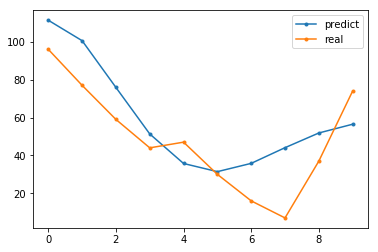

In [13]:
plt.plot(arma.forecast(steps=10)[0], '.-', label="predict")  # 输出后续 10 个预测结果
plt.plot(test_data.values, '.-', label="real")
plt.legend()

可以看出，预测结果还是能比较准确地反应出数据趋势。关于 ARMA 模型评估这里就不再赘述了，因为都是连续型数值预测，可以使用在回归分析中学到的相关方法进行评估。例如，计算 MSE 等指标。 

最后，我们总结一下 ARMA 建模步骤如下：

获取序列 → 通过平稳性检验 → 通过纯随机性检验 → 估计 $p$ 和 $q$ 参数 → ARMA 建模 → 模型评估。

上面，我们通过 ARMA 对时间序列建模的过程中，首先就要使得序列满足「平稳」要求。那么，对于不平稳序列而言，例如一开始人口变化的 `series1` 序列，如果要分析该怎么办呢？

此时，如果能想办法使序列变得更加平稳，那么就可以应用 ARMA 进行解算了。而这里要学习一种使序列平稳的方法：差分。

### 差分运算

差分运算实际上是一种从序列中提取确定性信息的方法，也是一种非常基础的数学分析手段。下面，我们对差分计算的方法和公式进行回顾。

如果我们对两个序列相邻值（延迟 1 期）作减法运算，就可以记 $\nabla x_t$ 为 $x_t$ 的 $1$ 阶差分，公式如下：

$$\nabla x_t = x_t - x_{t-1}$$

此时，如果对 $1$ 阶差分后的序列再进行一次 $1$ 阶差分运算，就可以记 $\nabla^2 x_t$ 为 $x_t$ 的 $2$ 阶差分，公式如下：

$$\nabla^2 x_t = \nabla x_t - \nabla x_{t-1}$$

那么，依次类推，对 $p-1$ 阶差分后序列再进行一次 $1$ 阶差分运算，就可以记 $\nabla^p x_t$ 为 $x_t$ 的 $p$ 阶差分，公式如下：

$$\nabla^p x_t = \nabla^{p-1} x_t - \nabla^{p-1} x_{t-1}$$

除此之外，如果两个序列值之间延迟 $k$ 期再做减法运算称为 $k$ 步差分运算，记 $\nabla_k x_t$ 为 $x_t$ 的 $k$ 阶步差分，公式如下：

$$\nabla_k x_t = x_t - x_{t-k}$$

接下来，我们使用 Pandas 对 `series1` 序列进行 1 阶差分运算并绘图，同时对差分后的数据进行平稳性和纯随机性检验。

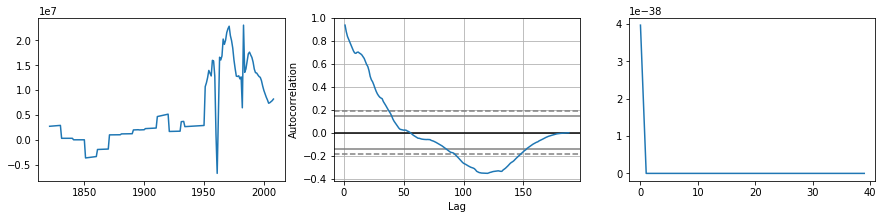

In [14]:
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(15, 3))

diff1 = series1.diff().dropna()  # 1 阶差分

axes[0].plot(diff1)  # 绘图
autocorrelation_plot(diff1, ax=axes[1])  # 平稳性检验
axes[2].plot(acorr_ljungbox(diff1)[1])  # 纯随机检验

尝试一下 1 阶 2 步差分：

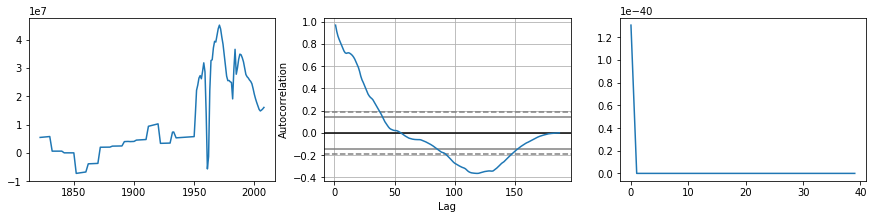

In [15]:
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(15, 3))

diff1 = series1.diff(periods=2).dropna()  # 1 阶 2 步差分

axes[0].plot(diff1)  # 绘图
autocorrelation_plot(diff1, ax=axes[1])  # 平稳性检验
axes[2].plot(acorr_ljungbox(diff1)[1])  # 纯随机检验

看来调整差分的步长，并不能有效地改善稳定性。接下来，我们执行 2 阶差分：

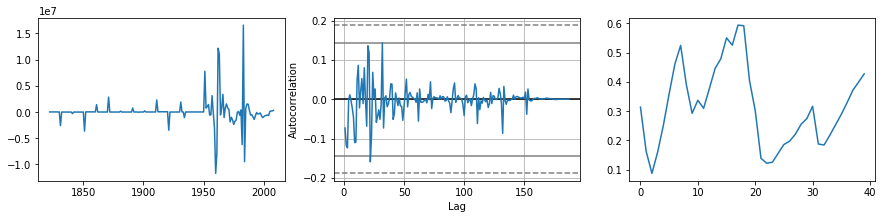

In [16]:
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(15, 3))

diff2 = series1.diff().diff().dropna()  # 2 阶差分

axes[0].plot(diff2)  # 绘图
autocorrelation_plot(diff2, ax=axes[1])  # 平稳性检验
axes[2].plot(acorr_ljungbox(diff2)[1])  # 纯随机检验

如上所述，2 阶差分让数据平稳很多，但是纯随机性并没有通过检验。在这种情况下，我们可能更偏向于选择数据不那么随机的参数，也就是 $d=1$。

一般在差分时阶数不宜过大。原因在于差分其实是对信息提取加工的过程，每次差分都会带来信息损失，过度差分会导致有效信息损失而降低精度。一般情况下，线性变化通过 1 次差分即可平稳，非线性趋势 2，3 次差分也能变得平稳，一般差分次数不超过 2 次。

### ARIMA 介绍及建模

上面我们提到过，ARIMA 模型适合于对非平稳序列进行建模分析。你可能观察到 ARIMA 比 ARMA 多了一个 I 字母，其实这个 I 就代表差分。与此同时，相比于 ARMA 模型中存在的 $p$, $q$ 参数，ARIMA 多了一个参数，那就是使非平稳序列成为平稳序列所做的差分阶数 $d$。所以，ARIMA 模型通常记作：$ARIMA(p, d, q)$。

接下来，我们使用差分后的数据确定 $p$, $q$ 参数，这一步和 ARMA 建模相似，这里我们使用 AIC 解算结果确定参数，当然也可以使用另外两种。

In [17]:
train_data = series1[:-40]  # 约 80% 训练
test_data = series1[-40:]

arma_order_select_ic(train_data.diff().dropna(), ic='aic')['aic_min_order']  # AIC

(2, 2)

注意，我们会根据差分结果来确定 $p$, $q$ 参数。根据 AIC 的值，确定 $p=2$, $q=2$。

In [18]:
from statsmodels.tsa.arima_model import ARIMA

arima = ARIMA(train_data, order=(2, 1, 2)).fit()  # 定义并训练模型

同样，这里输出测试结果，并将其与真实结果对比。

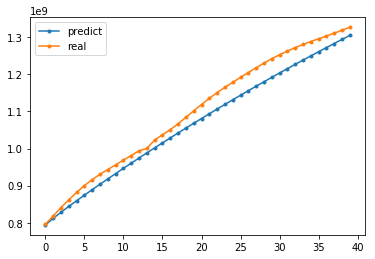

In [19]:
plt.plot(arima.forecast(steps=40)[0], '.-', label="predict")  # 输出后续 40 个预测结果
plt.plot(test_data.values, '.-', label="real")
plt.legend()

由图可见预测结果还算理想，基本符合真实数据的趋势。最后我们总结时间序列分析建模大致流程如下：

![](https://upload-images.jianshu.io/upload_images/15406304-f9271c79bd396dd0.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)

### 实验总结

本次实验中，我们了解到了一些时间序列分析建模相关的理论方法，并学习了使用 ARMA 和 ARIMA 对平稳和非平稳时间序列的建模思想，同时应用 Python 中著名的 statsmodels 库完成了建模分析过程。

实验梳理了时间序列建模的流程，但并没有对其中涉及到的统计学理论进行深入讨论和推导。原因在于，其所涉及到的理论知识内容量已大大超出课程的预计。如果你对时间序列分析过程非常感兴趣。欢迎购买和阅读中国人民大学出版社出版的《应用时间序列分析》。中国人民大学作为统计学专业国内最著名的院校，也采用了该书用于本科生教学。

#### 参考文献

- 王燕，应用时间序列分析 [M]，北京：中国人民大学出版社